### Importing the libraries


In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the dataset 

In [2]:
data = pd.read_csv('911.csv')

In [3]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
645711,40.136020,-75.354606,BEECH DR & SPRUCE ST; WEST NORRITON; Station ...,19403.0,EMS: FRACTURE,2020-06-08 13:07:24,WEST NORRITON,BEECH DR & SPRUCE ST,1
645712,40.172526,-75.284653,DEKALB PIKE & BLUE BELL SPRINGS DR; WHITPAIN;...,19422.0,EMS: RESPIRATORY EMERGENCY,2020-06-08 13:10:11,WHITPAIN,DEKALB PIKE & BLUE BELL SPRINGS DR,1
645713,40.125814,-75.406699,TROOPER RD & TURN LANE; WEST NORRITON; Statio...,NaN,EMS: SYNCOPAL EPISODE,2020-06-08 13:10:41,WEST NORRITON,TROOPER RD & TURN LANE,1
645714,40.197947,-75.533853,FOXCROFT CIR & FOXMEADOW DR; LIMERICK; Statio...,19468.0,EMS: ALTERED MENTAL STATUS,2020-06-08 13:11:45,LIMERICK,FOXCROFT CIR & FOXMEADOW DR,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645716 entries, 0 to 645715
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        645716 non-null  float64
 1   lng        645716 non-null  float64
 2   desc       645716 non-null  object 
 3   zip        567493 non-null  float64
 4   title      645716 non-null  object 
 5   timeStamp  645716 non-null  object 
 6   twp        645434 non-null  object 
 7   addr       645716 non-null  object 
 8   e          645716 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.3+ MB


### Top 5 zipcodes for 911 calls

In [5]:
#nlargest 

data.nlargest(5,['zip'])

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
66737,30.333596,-95.595595,8931; MONTGOMERY; Station 311; 2016-06-02 @ 1...,77316.0,EMS: CARDIAC EMERGENCY,2016-06-02 13:31:21,MONTGOMERY,8931,1
25529,32.387090,-86.276106,600 ; MONTGOMERY; 2016-02-12 @ 18:44:37;,36107.0,Traffic: DISABLED VEHICLE -,2016-02-12 18:44:37,MONTGOMERY,600,1
383237,40.090661,-75.378520,RAMP KOFP SERVICE PLZ TO I276 & KING OF PRUSS...,23005.0,Traffic: DISABLED VEHICLE -,2018-08-13 09:54:53,UPPER MERION,RAMP KOFP SERVICE PLZ TO I276 & KING OF PRUSS...,1
557265,40.090661,-75.378520,RAMP KOFP SERVICE PLZ TO I276 & KING OF PRUSS...,23005.0,Traffic: VEHICLE ACCIDENT -,2019-10-11 15:42:23,UPPER MERION,RAMP KOFP SERVICE PLZ TO I276 & KING OF PRUSS...,1
408858,40.309711,-75.510200,DOGWOOD DR & ASTER LN; UPPER FREDERICK; 2018-1...,21701.0,Fire: FIRE ALARM,2018-10-15 09:48:27,UPPER FREDERICK,DOGWOOD DR & ASTER LN,1


In [6]:
data['zip'].value_counts().head(5)

19401.0    44247
19464.0    42630
19403.0    33934
19446.0    31323
19406.0    21865
Name: zip, dtype: int64

### Top 5 townships for 911 calls

In [7]:
data['twp'].value_counts().head(5)

LOWER MERION    54204
ABINGTON        38929
NORRISTOWN      36471
UPPER MERION    35098
CHELTENHAM      29774
Name: twp, dtype: int64

### Number of unique cases

In [8]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    145526
Traffic: DISABLED VEHICLE -     46808
Fire: FIRE ALARM                37187
EMS: FALL VICTIM                33541
EMS: RESPIRATORY EMERGENCY      33355
                                ...  
Fire: ANIMAL COMPLAINT              1
Fire: ROAD OBSTRUCTION              1
EMS: VEHICLE LEAKING FUEL           1
Fire: FOOT PATROL                   1
Fire: CVA/STROKE                    1
Name: title, Length: 147, dtype: int64

In [9]:
data['title'].nunique()

147

## Creating new features 

### Splittign the title column

In [10]:
data['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                     ...            
645711                 EMS: FRACTURE
645712    EMS: RESPIRATORY EMERGENCY
645713         EMS: SYNCOPAL EPISODE
645714    EMS: ALTERED MENTAL STATUS
645715              Fire: FIRE ALARM
Name: title, Length: 645716, dtype: object

In [11]:
x = data['title'][0]

In [12]:
x

'EMS: BACK PAINS/INJURY'

In [13]:
x.split(':')[0]

'EMS'

In [14]:
data['reason'] = data['title'].apply(lambda title: title.split(":")[0])

In [15]:
data['reason']

0          EMS
1          EMS
2         Fire
3          EMS
4          EMS
          ... 
645711     EMS
645712     EMS
645713     EMS
645714     EMS
645715    Fire
Name: reason, Length: 645716, dtype: object

### Most common reason for 911 calls

In [16]:
data['reason'].value_counts()

EMS        322880
Traffic    225213
Fire        97623
Name: reason, dtype: int64

### plotting the most common reasons

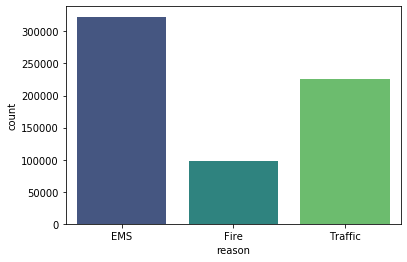

In [17]:
sns.countplot(x='reason',data = data, palette='viridis')

### Working with time

In [18]:
type(data['timeStamp'].iloc[0]) # its a string

str

In [19]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [20]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Making the timeStamp to a readable format

In [21]:
hour = data['timeStamp'].iloc[0]
hour.hour

17

In [22]:
month = data['timeStamp'].iloc[0]
month.month

12

In [23]:
dow = data['timeStamp'].iloc[0]
dow.dayofweek

3

In [24]:
data['hour'] = data['timeStamp'].apply(lambda hour: hour.hour)

In [25]:
data['hour']

0         17
1         17
2         14
3         16
4         16
          ..
645711    13
645712    13
645713    13
645714    13
645715    13
Name: hour, Length: 645716, dtype: int64

In [26]:
data['month'] = data['timeStamp'].apply(lambda month: month.month)

In [27]:
data['month']

0         12
1         12
2         12
3         12
4         12
          ..
645711     6
645712     6
645713     6
645714     6
645715     6
Name: month, Length: 645716, dtype: int64

In [28]:
data['DoW'] = data['timeStamp'].apply(lambda dow: dow.dayofweek)

In [29]:
data['DoW'] # sunday = 0 

0         3
1         3
2         3
3         3
4         3
         ..
645711    0
645712    0
645713    0
645714    0
645715    0
Name: DoW, Length: 645716, dtype: int64

In [30]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,DoW
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [31]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [32]:
data['DoW'] = data['DoW'].map(dmap)

In [33]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,DoW
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


### Plot to check which days the most 911 calls have been made 

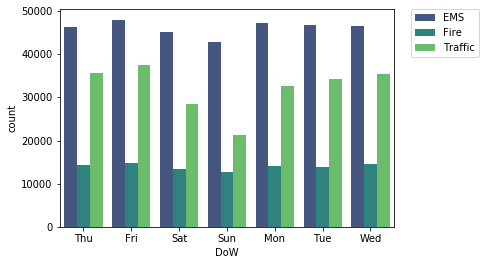

In [34]:
sns.countplot(x='DoW',data = data, hue='reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

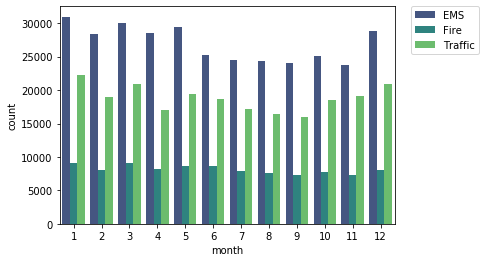

In [35]:
sns.countplot(x='month',data = data, hue='reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

### Getting the date from the timeStamp

In [36]:
data['date'] = data['timeStamp'].apply(lambda t: t.date())

In [37]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,DoW,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [38]:
data.groupby('date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,DoW
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


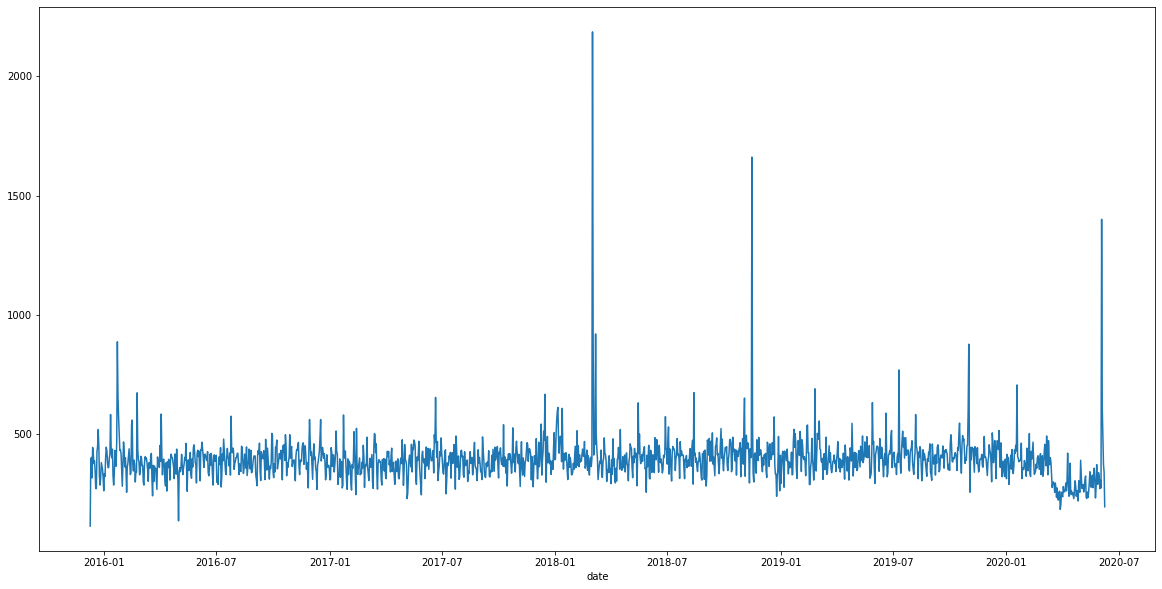

In [39]:
plt.figure(figsize=(20,10))
plt.tight_layout()
data.groupby('date').count()['reason'].plot()


### Plots based on reason

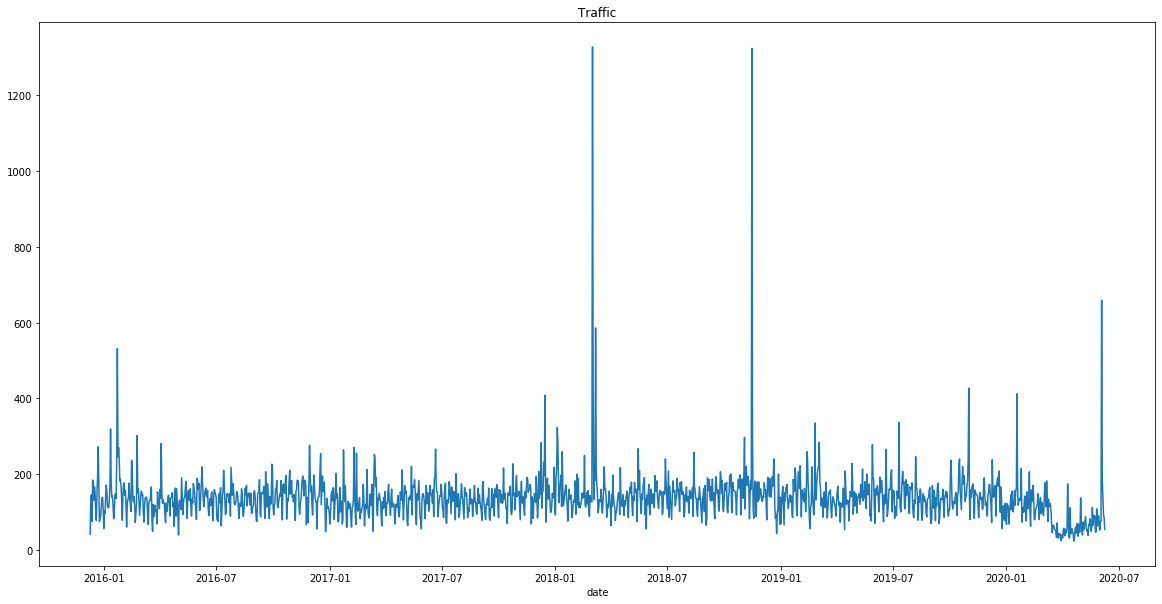

In [40]:
plt.figure(figsize=(20,10))
plt.title('Traffic')
data[data['reason']=='Traffic'].groupby('date').count()['reason'].plot()

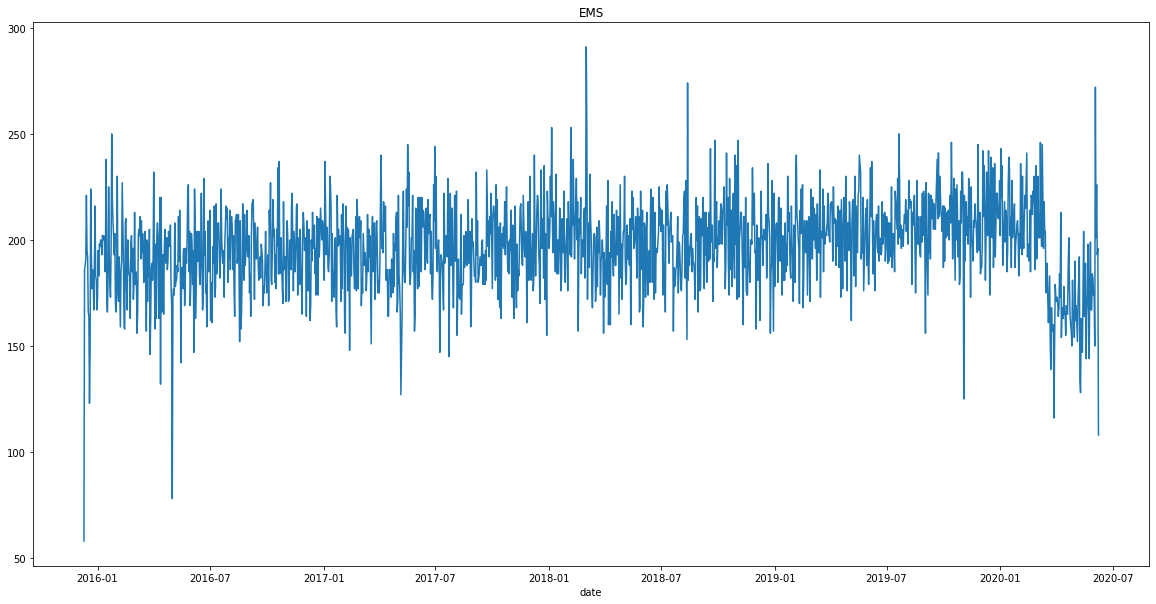

In [41]:
plt.figure(figsize=(20,10))
plt.title('EMS')
data[data['reason']=='EMS'].groupby('date').count()['reason'].plot()

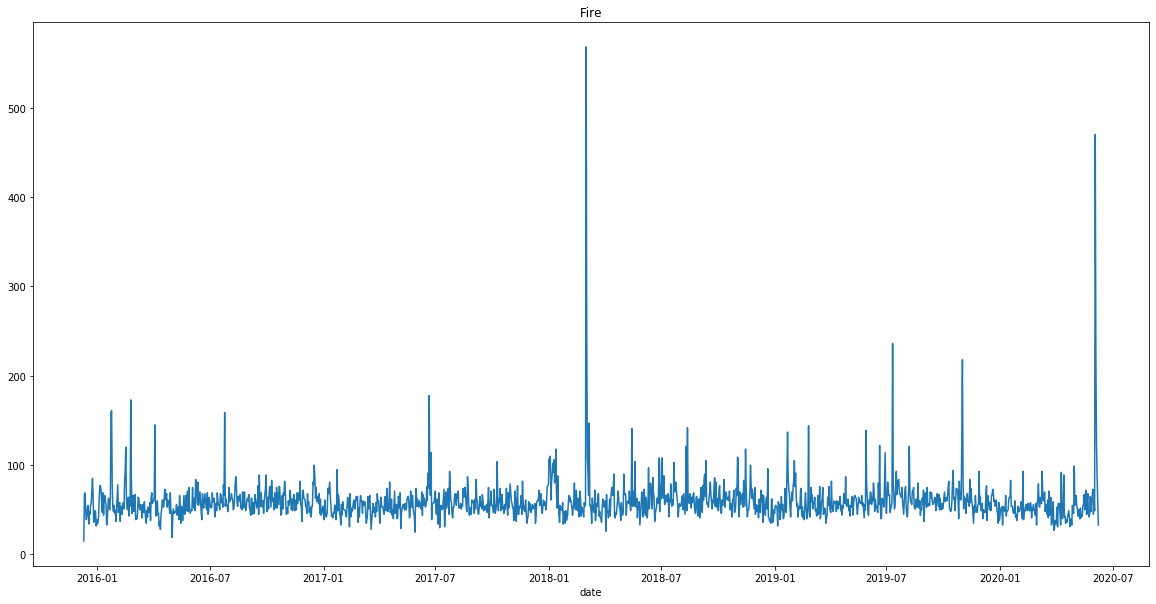

In [42]:
plt.figure(figsize=(20,10))
plt.title('Fire')
data[data['reason']=='Fire'].groupby('date').count()['reason'].plot()

### Using unstack() to make matrices for heatmaps

In [46]:
hour_df = data.groupby(['DoW','hour']).count()['reason'].unstack()

In [47]:
hour_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DoW,,,,,,,,,,,,,,,,,,,,,
Fri,1925,1589,1413,1265,1297,1595,2617,4069,4928,5168,...,6200,6851,6908,6933,5520,4920,4257,3782,3326,2778
Mon,1851,1520,1324,1244,1306,1795,2622,4347,5401,5597,...,5488,6025,6159,6235,5274,4346,3662,3146,2581,2013
Sat,2370,2001,1843,1549,1407,1523,1840,2431,3371,4220,...,5291,5045,5071,5060,4844,4639,4024,3776,3123,2885
Sun,2365,2089,1894,1578,1435,1452,1690,2336,2931,3623,...,4609,4334,4443,4384,4258,4036,3628,3061,2543,2268
Thu,1672,1372,1376,1200,1243,1729,2752,4355,5203,5268,...,5918,6315,6221,6783,5376,4581,3959,3409,2773,2308
Tue,1660,1412,1282,1175,1208,1688,2717,4314,5493,5408,...,5759,6087,6310,6710,5485,4466,3729,3301,2604,2065
Wed,1614,1430,1223,1223,1091,1549,2591,4555,5363,5292,...,5897,6368,6610,6899,5528,4577,4018,3444,2744,2151


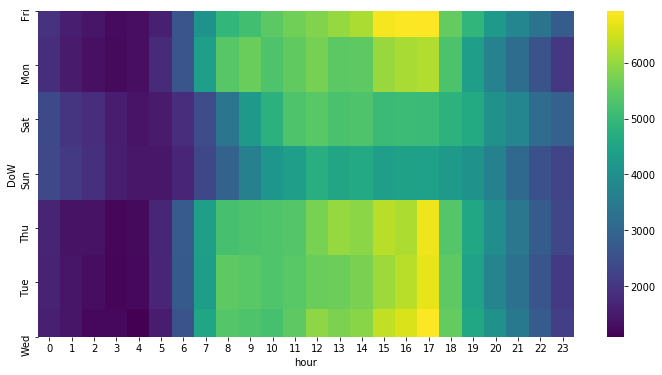

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(hour_df, cmap='viridis')

### clustermap

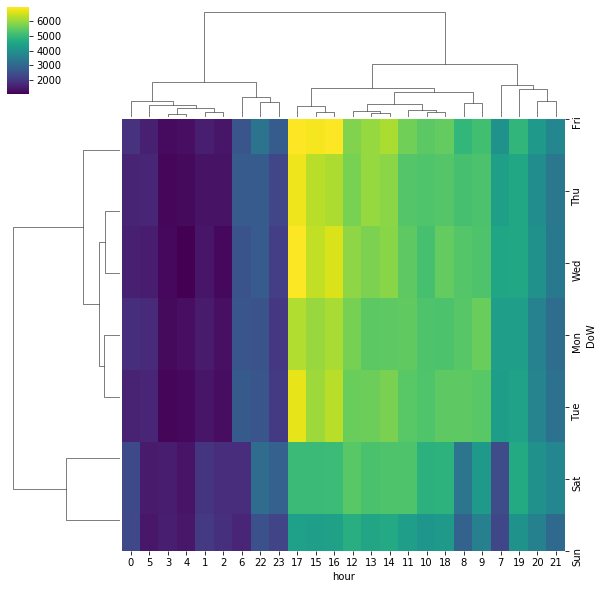

In [53]:
#plt.figure(figsize=(12,6))
sns.clustermap(hour_df, cmap='viridis')

In [59]:
 month_df=data.groupby(['DoW','month']).count()['reason'].unstack()

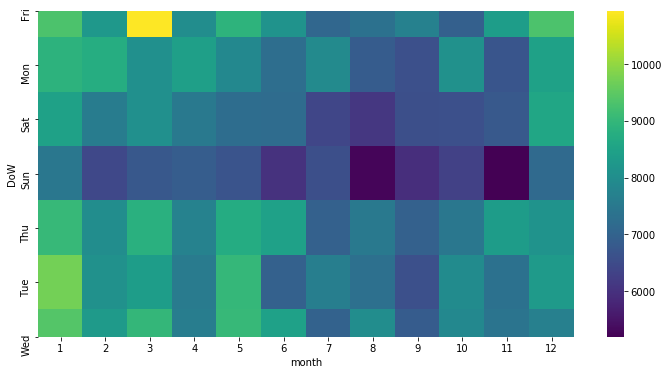

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(month_df,cmap='viridis')

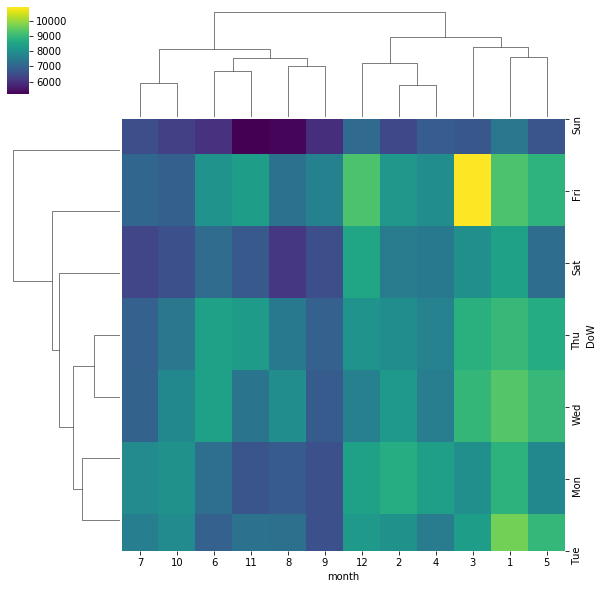

In [62]:
sns.clustermap(month_df,cmap='viridis')